### Required Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Load MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Normalize Pixel Values (0 to 1)

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Flatten Images

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

### Label One-hot Encoding

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Neural Network

In [6]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

### Model Compilation

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5


938/938 [==============================] - 5s 4ms/step - loss: 0.4834 - accuracy: 0.8545 - val_loss: 0.1601 - val_accuracy: 0.9524
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.2127 - accuracy: 0.9413 - val_loss: 0.1187 - val_accuracy: 0.9649
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1645 - accuracy: 0.9544 - val_loss: 0.1010 - val_accuracy: 0.9696
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1424 - accuracy: 0.9608 - val_loss: 0.0937 - val_accuracy: 0.9721
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1218 - accuracy: 0.9655 - val_loss: 0.0983 - val_accuracy: 0.9710


### Model Evaluation

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9710
Test accuracy: 0.9710000157356262


### Save Results

In [10]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_classes = [tf.argmax(prediction).numpy() for prediction in predictions]

# Create a DataFrame with the predicted classes
results_df = pd.DataFrame({'Class': predicted_classes})

# Save the DataFrame to a CSV file
results_df.to_csv('Q4.csv', index=False)

313/313 [==============================] - 1s 1ms/step


### Confusion Matrix

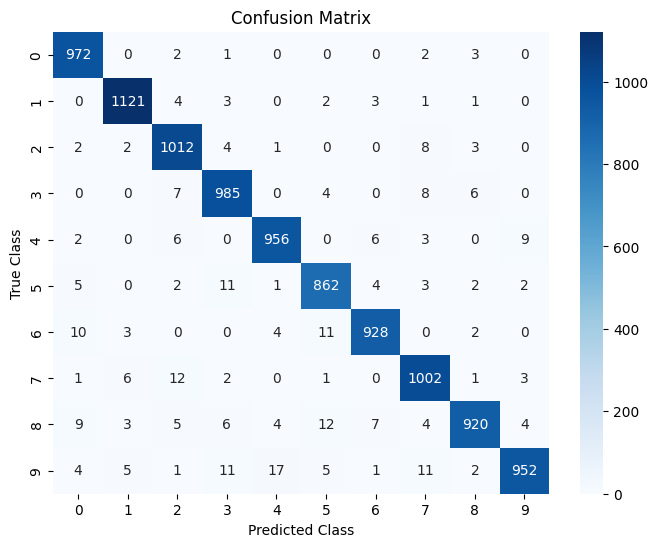

In [11]:
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print("Classification Report:")
print(classification_report(test_labels.argmax(axis=1), predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

